In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('news_score.1csv.csv')

df.head()


,author,contents,description,publisher,source_url,title,date,time,Open,High,...,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf
0,Bitcoinist.net,real time prices vires numeris bitcoin ethereu...,israel finance ministry bank israel considerin...,Bitcoinist.com,http://bitcoinist.com/kosher-crypto-bitcoen-se...,Kosher Crypto BitCoen Is Setting a Course for ...,2/2/18,0:00:08,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,96.0,0.0,3.0,-1.0,0.4,0.4,0.31545
1,Michelle Fox,var postloadfunctions var foresee enabled var ...,bitcoin may still drop rally back year early b...,CNBC,https://www.cnbc.com/2018/02/01/bitcoin-near-b...,"Bitcoin near bottom, will rally to $20,000 thi...",2/2/18,0:02:00,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,146.0,0.0,3.0,0.0,0.1,0.1,0.49858
2,Scott Scanlon,core cryptocurrency networks miners people use...,core cryptocurrency networks miners people use...,Youbrandinc.com,https://www.youbrandinc.com/crytocurrency/brai...,Brain Genius Submerges His Bitcoin Mining Rig ...,2/2/18,0:03:08,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,1181.0,0.0,-1.0,-1.0,0.4,0.4,0.31795
3,Bruce Kleinman,demons digital gold part already done please r...,demons digital gold part,Hackernoon.com,https://hackernoon.com/remediation-wherefore-a...,"Remediation, wherefore art thou?",2/2/18,0:18:34,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,452.0,0.0,3.0,0.0,0.2,0.2,0.97540
4,Jason Murphy,email password remember feb systems underpinni...,systems underpinning bitcoin truly revolutiona...,Crikey.com.au,https://www.crikey.com.au/2018/02/02/cryptotra...,Cryptotragedy: what if bitcoin’s greatest stre...,2/2/18,0:25:09,8547.864403,8562.224306,...,12603.49354,433909.3344,2087.647258,220.0,0.0,0.0,0.0,0.8,0.8,0.33696


In [5]:
df=df[df.author_L != -1]
df=df[df.publisher_L != -1]
df=df[df.score_sentiment != -2]
df=df[df.magnitude_sentiment != -2]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 662 to 6381
Data columns (total 25 columns):
author                 1592 non-null object
contents               1592 non-null object
description            1592 non-null object
publisher              1592 non-null object
source_url             1592 non-null object
title                  1592 non-null object
date                   1592 non-null object
time                   1592 non-null object
Open                   1592 non-null float64
High                   1592 non-null float64
Low                    1592 non-null float64
Close                  1592 non-null float64
Volume_(BTC)           1592 non-null float64
Volume_(Currency)      1592 non-null float64
Weighted_Price         1592 non-null float64
Average                1592 non-null float64
Volatility             1592 non-null float64
SD                     1592 non-null float64
publisherLabel         1592 non-null float64
Mark                   1592 non-null float64

In [7]:
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,7998.314074,8005.845712,7990.331678,7998.165464,22.971678,178354.469303,7998.063760,10454.873033,258050.691208,1241.546967,550.798367,-0.555276,2.059673,1.027638,0.061997,0.405088,0.400748
std,275.612360,272.661447,279.081417,276.021757,9.925218,66599.168545,275.878077,776.219503,100841.975220,485.176179,353.631823,0.831927,1.113691,1.058557,0.483889,0.271653,0.175551
min,7615.109937,7629.812951,7598.931764,7613.970403,9.265880,74305.946820,7614.280886,9925.651689,186053.073600,895.148268,0.000000,-1.000000,0.000000,0.000000,-0.900000,0.000000,0.196730
25%,7671.665139,7678.224667,7664.668903,7671.829257,17.478690,146635.134600,7671.580421,10002.521880,186053.073600,895.148268,199.000000,-1.000000,1.000000,0.000000,-0.300000,0.200000,0.276382
50%,8102.868882,8108.615118,8096.967313,8102.989847,19.087727,154043.483800,8102.691218,10130.017600,219431.703100,1055.741274,536.500000,-1.000000,3.000000,1.000000,0.100000,0.400000,0.329850
75%,8102.868882,8108.615118,8096.967313,8102.989847,20.920029,160434.948700,8102.691218,10130.017600,231620.464900,1114.384481,846.000000,-1.000000,3.000000,2.000000,0.500000,0.600000,0.491200
max,8346.620701,8352.094882,8341.208083,8346.892236,41.047748,297975.902000,8346.738321,11917.267390,446037.816100,2146.000443,1186.000000,1.000000,3.000000,3.000000,0.900000,0.900000,1.235600


In [8]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example

def onehotencoding_fun(data):
    values = array(data)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    #print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    #print(onehot_encoded)
    # invert first example
    inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
    #print(inverted)
    return onehot_encoded 

In [9]:
publisher_L_data = df['publisher_L']
author_L_data = df['author_L']
onehot_publisher_L = onehotencoding_fun(publisher_L_data)
onehot_author_L = onehotencoding_fun(author_L_data)

#df['publisher_L_onehot'] = onehot_publisher_L
#df['author_L_onehot'] = onehot_author_L
df['publisher_L_onehot'] = 0
df['author_L_onehot'] = 0
for i in range(len(author_L_data)):
    df['author_L_onehot'][i] = onehot_author_L[i]
for i in range(len(publisher_L_data)):
    df['publisher_L_onehot'][i] = onehot_publisher_L[i]

In [10]:
df.to_csv('data_onehot.csv')

# Setup Training and Validation Sets

In [259]:
X=df[['publisher_L_onehot','author_L_onehot','score_sentiment','magnitude_sentiment','tfidf']]
Y=df['Mark']

print(X.shape, Y.shape)

np.random.seed(2) # set random seed for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

(1592, 5) (1592,)
(1273, 5) (1273,)
(319, 5) (319,)


In [260]:
Y.value_counts()

-1.0    1238
 1.0     354
Name: Mark, dtype: int64

# label counts of different categories
Y.value_counts()

## 1. Logistic Regression

In [261]:
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
Y_pred_log = logreg.predict(X_val)                           # predict
Y_proba_log = logreg.predict_proba(X_val)

acc_log_2 = logreg.score(X_val, Y_val)
scores1 = cross_val_score(logreg, X_train, Y_train, scoring = ,cv=5)
# evaluate
print('Logistic Regression using built-in method:', str(round(acc_log_2*100,2)),'%')
print(scores1)

Logistic Regression using built-in method: 76.8 %
[0.78039216 0.78039216 0.78039216 0.77952756 0.77952756]


## 2. KNN

In [262]:
knn = KNeighborsClassifier(n_neighbors = 10)                  # instantiate
knn.fit(X_train, Y_train)                                    # fit
acc_knn = knn.score(X_val, Y_val)                            # predict + evaluate
prob_knn=knn.predict_proba(X_val)

scores2 = cross_val_score(knn, X_train, Y_train, cv=5)
print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')
print(scores2)

K-Nearest Neighbors labeling accuracy: 74.29 %
[0.76862745 0.76470588 0.75294118 0.75984252 0.75984252]


## 3. SVM

In [269]:
# Support Vector Machines Classifier (non-linear kernel)
import sklearn
svc = SVC(probability=True)                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

prob_svm=svc.predict_proba(X_val)
scores3 = cross_val_score(svc, X_train, Y_train, cv=5)
#Y_proba_svm=sklearn.svm.libsvm.predict_proba()
print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')
print(scores3)

Support Vector Machines labeling accuracy: 76.8 %
[0.78039216 0.78039216 0.78039216 0.77952756 0.77952756]


## 4. Perceptron

In [264]:
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_val, Y_val)              # predict + evalaute
scores4 = cross_val_score(perceptron, X_train, Y_train, cv=5)

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')
print(scores4)

Perceptron labeling accuracy: 76.8 %
[0.78039216 0.78039216 0.70588235 0.77952756 0.70472441]


## 5. Random Forest

In [265]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=1000)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_val, Y_val)                  # predict + evaluate

print('Random Forest labeling accuracy:', str(round(acc_rf*100,2)),'%')

predicted5=random_forest.predict(X_val)
prob_random=random_forest.predict_proba(X_val)
scores5 = cross_val_score(random_forest, X_train, Y_train, cv=5)
print(predicted5)
print(scores5)

Random Forest labeling accuracy: 89.97 %
[-1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.
  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.
 -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.
 -1.  1. -

## 6.XGBoost


In [267]:
import xgboost as xgb
# XGBoost, same API as scikit-learn
gradboost = xgb.XGBClassifier(n_estimators=1000)             # instantiate
gradboost.fit(X_train, Y_train)                              # fit
acc_xgboost = gradboost.score(X_val, Y_val)                  # predict + evalute

print('XGBoost labeling accuracy:', str(round(acc_xgboost*100,2)),'%')

XGBoost labeling accuracy: 83.39 %


## 7. Lasso

In [256]:
#from sklearn.linear_model import Lasso
#lasso = Lasso(alpha=0.00001, max_iter=10e5)
#lasso.fit(X_train,Y_train)
#train_score=lasso.score(X_val,Y_val)
#test_score=lasso.score(X_val,Y_val)
#coeff_used = np.sum(lasso.coef_!=0)

#print ("training score:", train_score )
#print ("test score: ", test_score)
#print ("number of features used: ", coeff_used)
#print(lasso.coef_)
#print(lasso.intercept_) 

## 8.1. ROC_AUC with LogisticReg

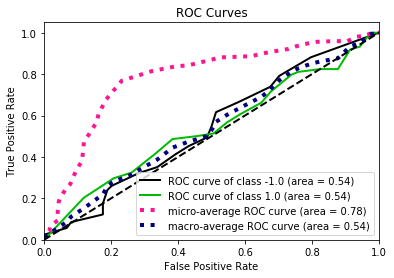

In [257]:
import sklearn

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(Y_val, Y_proba_log)
plt.show()

## 8.2. ROC_AUC with SVM

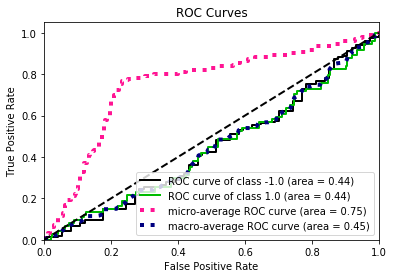

In [270]:
skplt.metrics.plot_roc(Y_val, prob_svm)
plt.show()

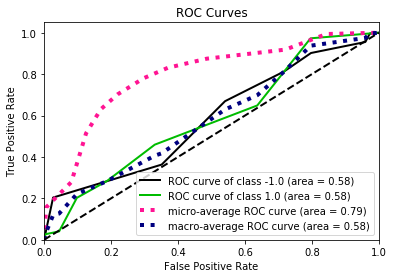

In [240]:
skplt.metrics.plot_roc(Y_val, prob_knn)
plt.show()

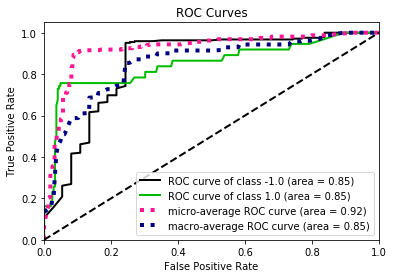

In [241]:
skplt.metrics.plot_roc(Y_val, prob_random)
plt.show()